In [ ]:
import pandas as pd

data = pd.read_csv("/content/mgcu Temperature data of 25 years.csv")
data

,DATE,TEMPERATURE
0,10-08-1998,30.46
1,11-08-1998,29.19
2,12-08-1998,30.83
3,13-08-1998,28.33
4,14-08-1998,27.62
...,...,...
9126,05-08-2023,31.28
9127,06-08-2023,31.93
9128,07-08-2023,28.81
9129,08-08-2023,29.76


In [ ]:
df = data.set_index(pd.DatetimeIndex(data['DATE']))
df

,DATE,TEMPERATURE
DATE,,
1998-10-08,10-08-1998,30.46
1998-11-08,11-08-1998,29.19
1998-12-08,12-08-1998,30.83
1998-08-13,13-08-1998,28.33
1998-08-14,14-08-1998,27.62
...,...,...
2023-05-08,05-08-2023,31.28
2023-06-08,06-08-2023,31.93
2023-07-08,07-08-2023,28.81


In [ ]:
data.describe()

,TEMPERATURE
count,9131.000000
mean,26.093223
std,7.242553
min,7.190000
25%,20.030000
50%,27.610000
75%,31.165000
max,43.660000


In [ ]:
#convert the 'Date column to a datatime type
data['DATE'] = pd.to_datetime(data['DATE'])

#Set the 'Date column as the index
data.set_index('DATE', inplace=True)
data

,TEMPERATURE
DATE,
1998-10-08,30.46
1998-11-08,29.19
1998-12-08,30.83
1998-08-13,28.33
1998-08-14,27.62
...,...
2023-05-08,31.28
2023-06-08,31.93
2023-07-08,28.81


In [ ]:
df1=df[['TEMPERATURE']]
df1

,TEMPERATURE
DATE,
1998-10-08,30.46
1998-11-08,29.19
1998-12-08,30.83
1998-08-13,28.33
1998-08-14,27.62
...,...
2023-05-08,31.28
2023-06-08,31.93
2023-07-08,28.81


<function matplotlib.pyplot.show(close=None, block=None)>

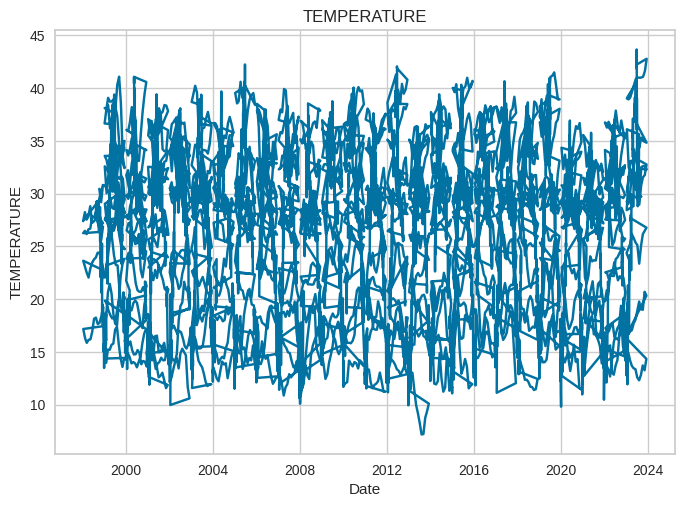

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['TEMPERATURE'])
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

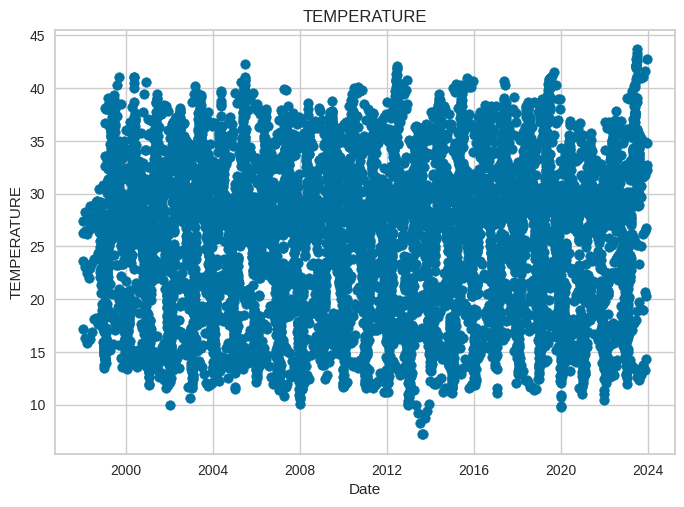

In [ ]:
plt.scatter(data.index, data['TEMPERATURE'])
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

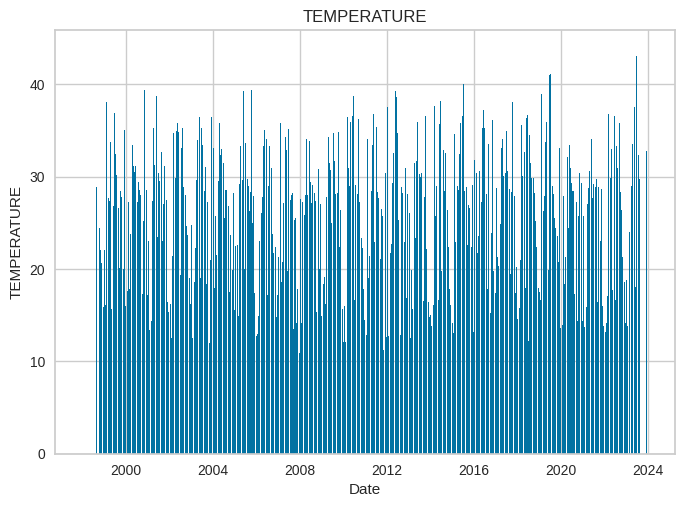

In [ ]:
plt.bar(data.index, data['TEMPERATURE'])
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')
plt.show

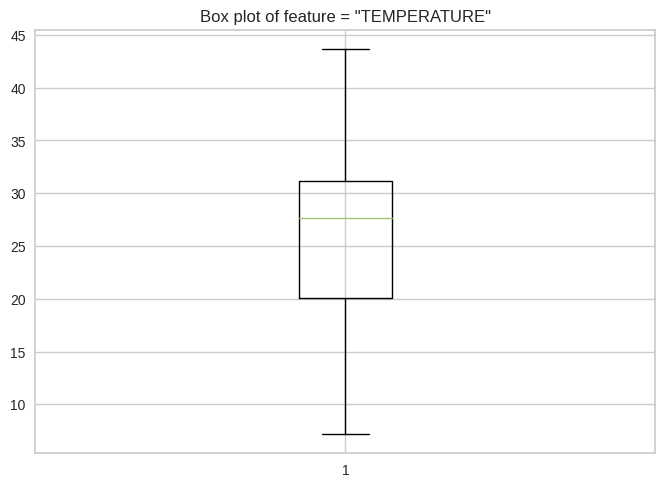

In [ ]:
plt.boxplot(data['TEMPERATURE'])

# Adding title
plt.title("Box plot of feature = \"TEMPERATURE\"")
plt.show()

In [ ]:
! pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['TEMPERATURE'],model= 'additive',period=100)
trend = decomposition.trend
seasonality=decomposition.seasonal
residuals = decomposition.resid

<function matplotlib.pyplot.show(close=None, block=None)>

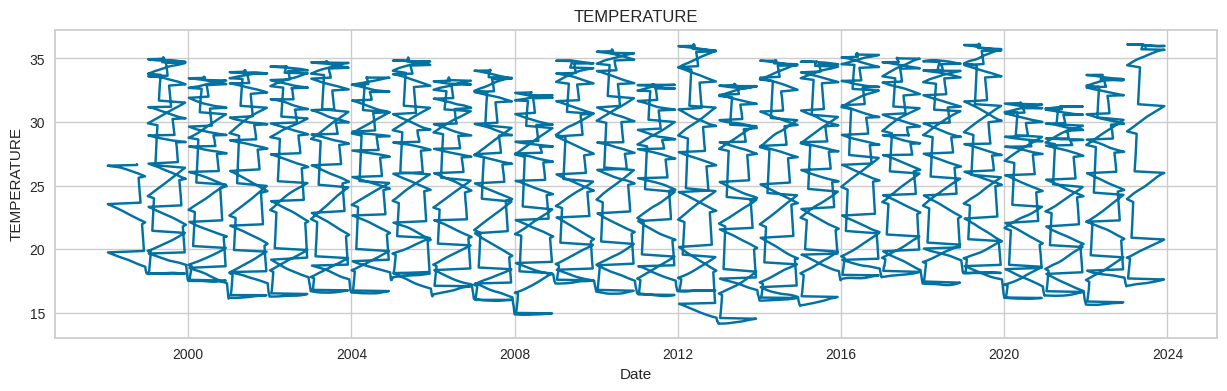

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(decomposition.trend)
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

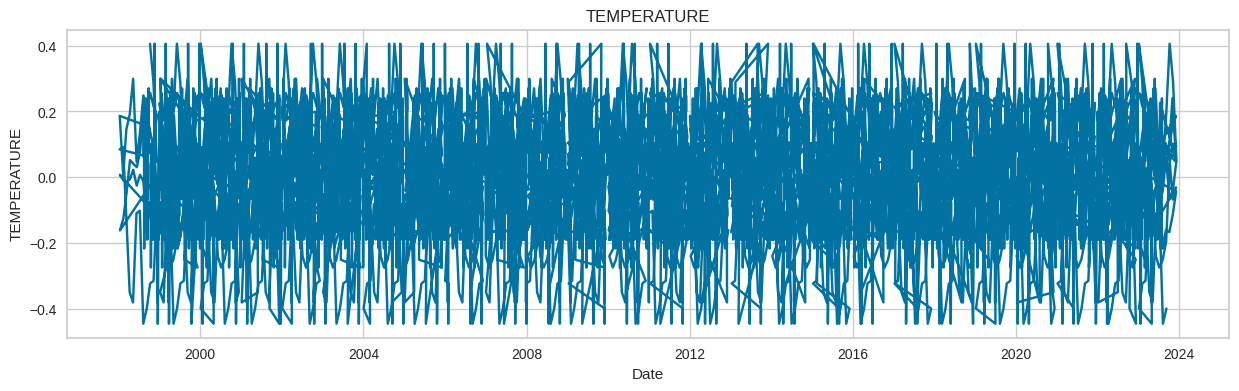

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(decomposition.seasonal)
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

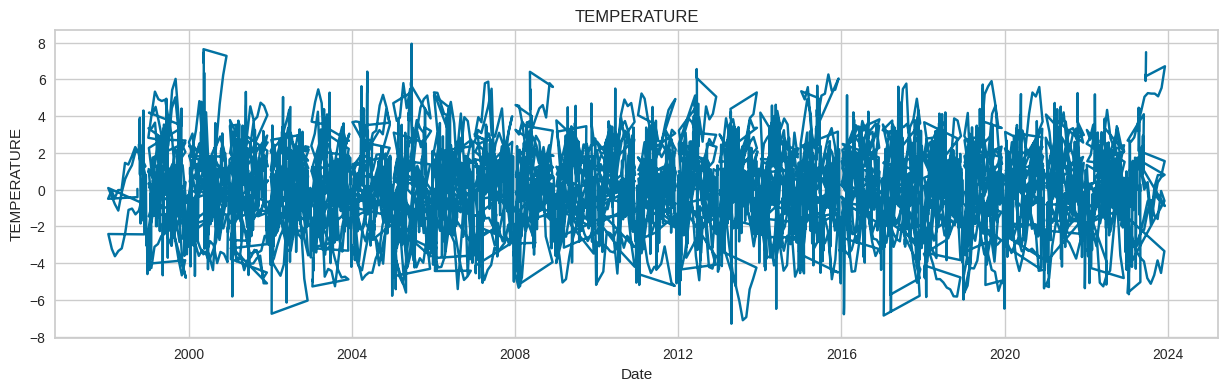

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(decomposition.resid)
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')
plt.show

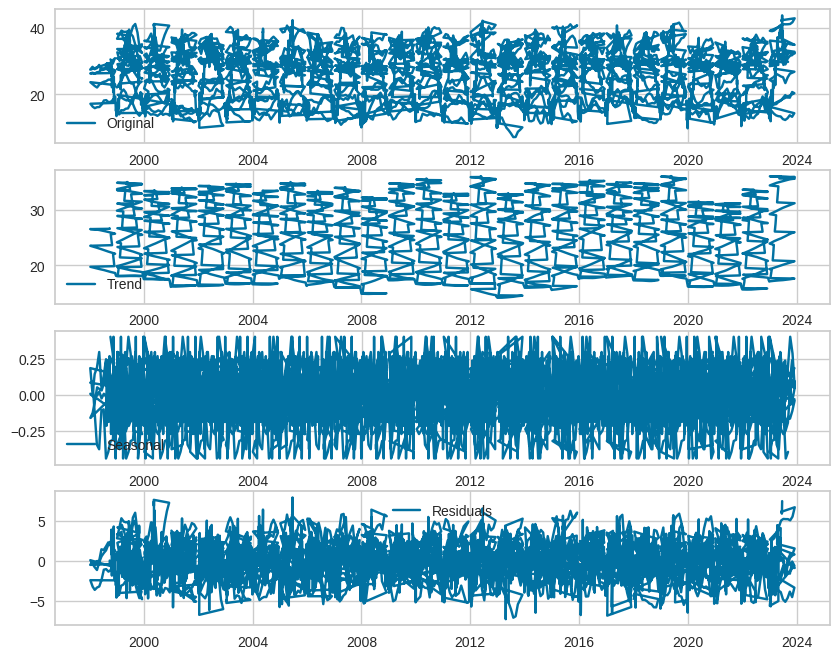

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data.index, data['TEMPERATURE'],label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(data.index, trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(data.index, seasonality,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(data.index, residuals,label='Residuals')
plt.legend(loc='best')

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

<Figure size 1000x400 with 0 Axes>

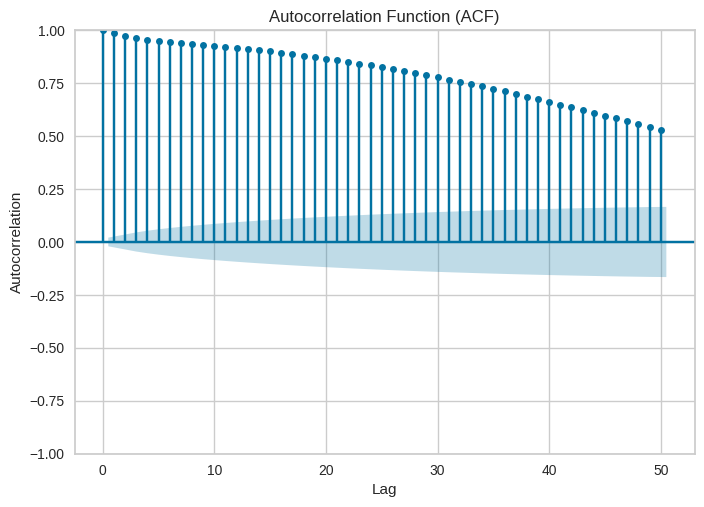

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,4))

plot_acf(data['TEMPERATURE'],lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')

Text(0.5, 1.0, 'Partial Autocorrelation Function (ACF)')

<Figure size 1500x800 with 0 Axes>

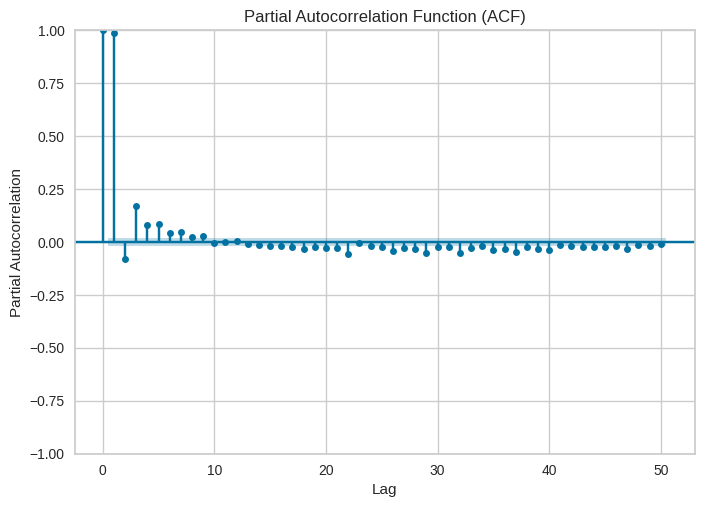

In [ ]:
plt.figure(figsize=(15,8))
plot_pacf(data['TEMPERATURE'],lags=50)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (ACF)')

In [ ]:
!pip install pycaret

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from pycaret.time_series import TSForecastingExperiment

fig_kwargs={'renderer': 'notebook'}
forecast_horizon = 40
fold = 3
exp = TSForecastingExperiment()

In [ ]:
df1=df1.bfill(axis ='rows')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9131 entries, 1998-10-08 to 2023-09-08
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TEMPERATURE  9131 non-null   float64
dtypes: float64(1)
memory usage: 142.7 KB


In [ ]:
df1= df1.asfreq('D')
exp.setup(data=df1, fh=forecast_horizon, numeric_imputation_target='mean',fold=fold, fig_kwargs=fig_kwargs, session_id=123)


,Description,Value
0,session_id,123
1,Target,TEMPERATURE
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(9464, 1)"
5,Transformed data shape,"(9464, 1)"
6,Transformed train set shape,"(9424, 1)"
7,Transformed test set shape,"(40, 1)"
8,Rows with missing values,3.5%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [ ]:
best= exp.compare_models(n_select=5)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.7039,0.9254,2.5231,4.6095,0.1060,0.0925,-0.0103,1.3000
theta,Theta Forecaster,0.7282,0.9313,2.6104,4.6388,0.1092,0.0960,-0.0275,0.0867
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7349,0.6544,2.6354,3.2595,0.1029,0.0993,0.4878,6.4467
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7624,0.7131,2.7337,3.5515,0.1081,0.1032,0.4047,3.9167
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8321,0.7683,2.9839,3.8270,0.1180,0.1096,0.2772,9.4600
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.8440,0.7269,3.0272,3.6214,0.1195,0.1157,0.2870,6.1100
grand_means,Grand Means Forecaster,0.8447,1.0033,3.0274,4.9968,0.1154,0.1108,-0.1498,0.0600
polytrend,Polynomial Trend Forecaster,0.8579,0.9991,3.0747,4.9758,0.1176,0.1127,-0.1405,0.0700
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.8862,0.7459,3.1790,3.7166,0.1221,0.1222,0.1894,17.3000
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.9506,0.8787,3.4086,4.3767,0.1335,0.1190,0.0060,1.8400


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [ ]:
df=pd.read_csv("/content/Top five models for mini project.csv").fillna(0)
df

,Unnamed: 0,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,naive,Naive Forecaster,0.7039,0.9254,2.5231,4.6095,0.1060,0.0925,-0.0103
1,theta,Theta Forecaster,0.7282,0.9313,2.6104,4.6388,0.1092,0.0960,-0.0275
2,xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonali...,0.7349,0.6544,2.6354,3.2595,0.1029,0.0993,0.4878
3,lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,0.7624,0.7131,2.7337,3.5515,0.1081,0.1032,0.4047
4,gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,0.8321,0.7683,2.9839,3.8270,0.1180,0.1096,0.2772


Text(0.5, 1.0, 'Mean Absolute Scaled Error')

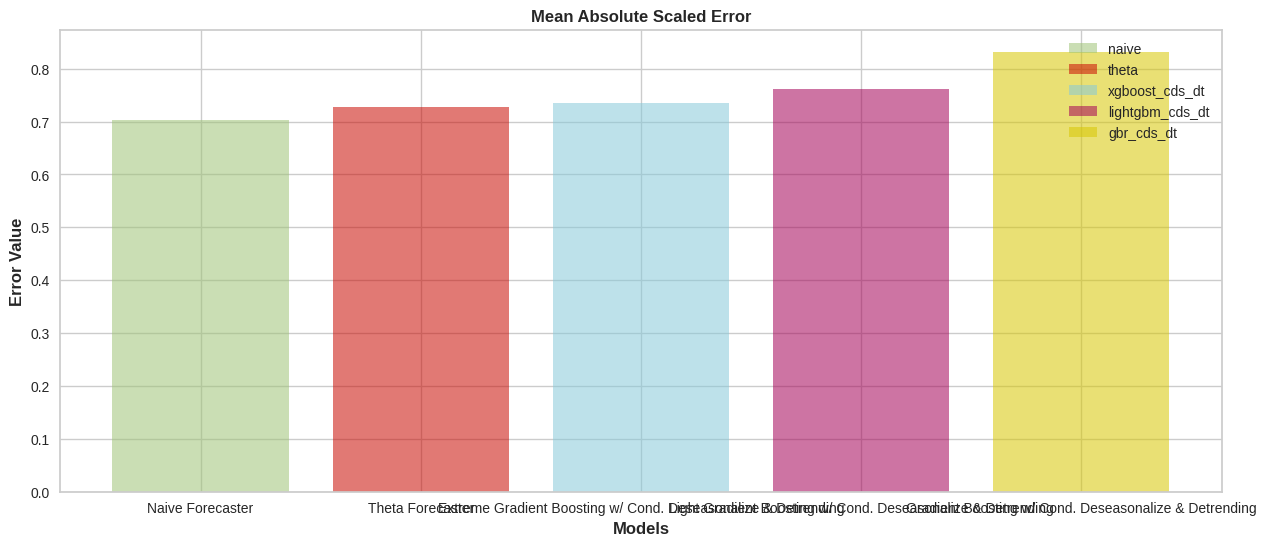

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
plt.xlabel('Models', fontsize = 12, weight = 'bold')
plt.ylabel('Error Value', fontsize = 12, weight = 'bold')
N = len(df['MASE'])
my_colors=['g','r','c','m','y']
model=['naive','theta','xgboost_cds_dt','lightgbm_cds_dt','gbr_cds_dt']
for x,y,c,lb in zip(df['Model'],df['MASE'],my_colors,model,):
    plt.bar(x, y, color=c,label=lb,alpha = 0.55)
plt.legend(model)
plt.title("Mean Absolute Scaled Error",fontsize = 12, weight = 'bold')

Text(0.5, 1.0, 'Root Mean Squared Scaled Error')

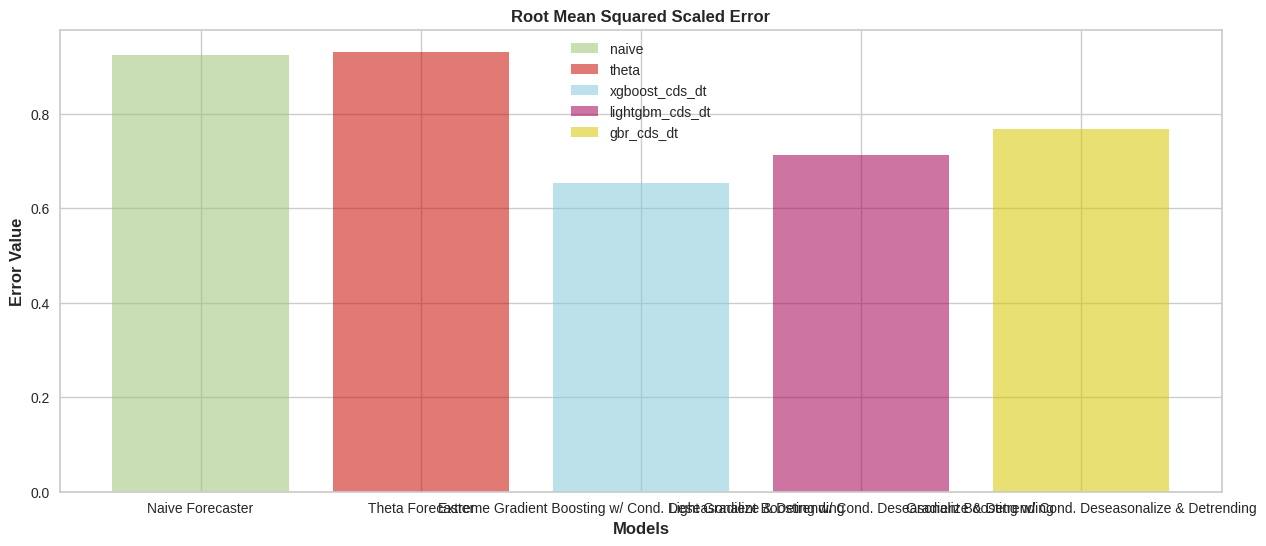

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
plt.xlabel('Models', fontsize = 12, weight = 'bold')
plt.ylabel('Error Value', fontsize = 12, weight = 'bold')
N = len(df['RMSSE'])
my_colors=['g','r','c','m','y']
model=['naive','theta','xgboost_cds_dt','lightgbm_cds_dt','gbr_cds_dt']
for x,y,c,lb in zip(df['Model'],df['RMSSE'],my_colors,model,):
    plt.bar(x, y, color=c,label=lb,alpha = 0.55)
plt.legend(model)
plt.title("Root Mean Squared Scaled Error",fontsize = 12, weight = 'bold')

Text(0.5, 1.0, 'Mean Absolute Error')

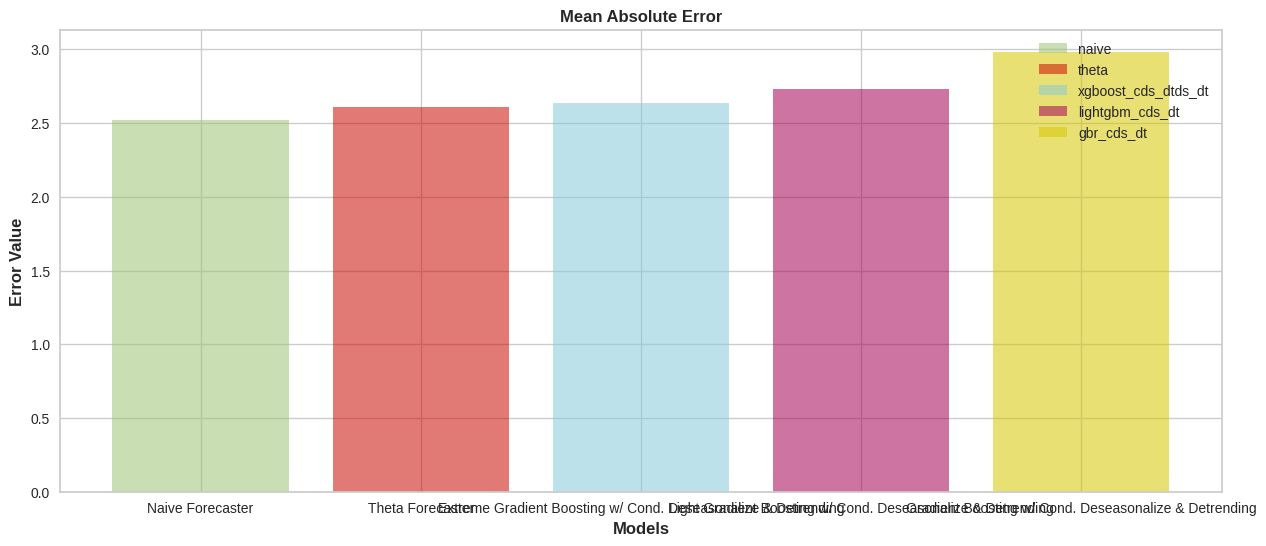

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
plt.xlabel('Models', fontsize = 12, weight = 'bold')
plt.ylabel('Error Value', fontsize = 12, weight = 'bold')
N = len(df['MAE'])
my_colors=['g','r','c','m','y']
model=['naive','theta','xgboost_cds_dtds_dt','lightgbm_cds_dt','gbr_cds_dt']
for x,y,c,lb in zip(df['Model'],df['MAE'],my_colors,model,):
    plt.bar(x, y, color=c,label=lb,alpha = 0.55)
plt.legend(model)
plt.title("Mean Absolute Error",fontsize = 12, weight = 'bold')

Text(0.5, 1.0, 'Root Mean Square Error')

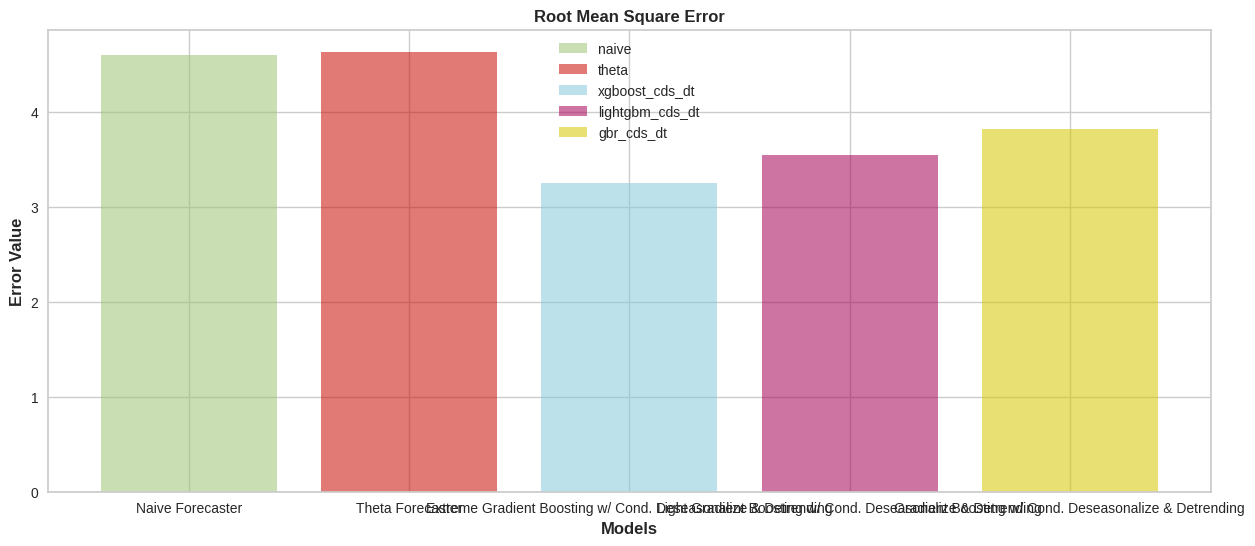

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
plt.xlabel('Models', fontsize = 12, weight = 'bold')
plt.ylabel('Error Value', fontsize = 12, weight = 'bold')
N = len(df['RMSE'])
my_colors=['g','r','c','m','y']
model=['naive','theta','xgboost_cds_dt','lightgbm_cds_dt','gbr_cds_dt']
for x,y,c,lb in zip(df['Model'],df['RMSE'],my_colors,model,):
    plt.bar(x, y, color=c,label=lb,alpha = 0.55)
plt.legend(model)
plt.title("Root Mean Square Error",fontsize = 12, weight = 'bold')

Text(0.5, 1.0, 'Mean Absolute Percentage Error')

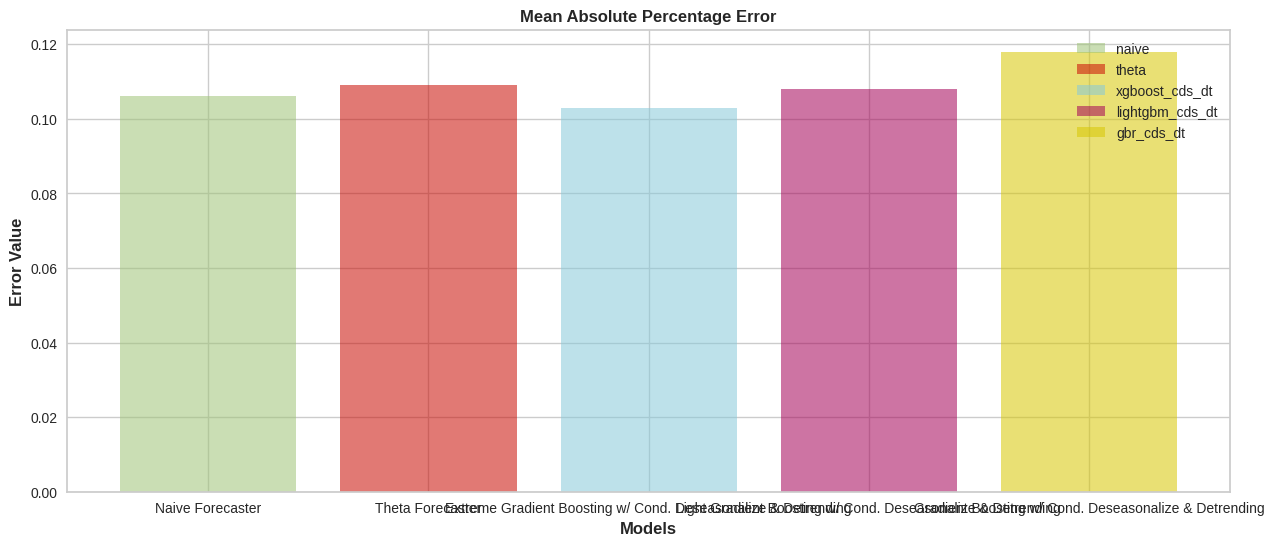

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
plt.xlabel('Models', fontsize = 12, weight = 'bold')
plt.ylabel('Error Value', fontsize = 12, weight = 'bold')
N = len(df['MAPE'])
my_colors=['g','r','c','m','y']
model=['naive','theta','xgboost_cds_dt','lightgbm_cds_dt','gbr_cds_dt']
for x,y,c,lb in zip(df['Model'],df['MAPE'],my_colors,model,):
    plt.bar(x, y, color=c,label=lb,alpha = 0.55)
plt.legend(model)
plt.title("Mean Absolute Percentage Error",fontsize = 12, weight = 'bold')

Text(0.5, 1.0, 'Symmetric Mean Absolute Percentage Error')

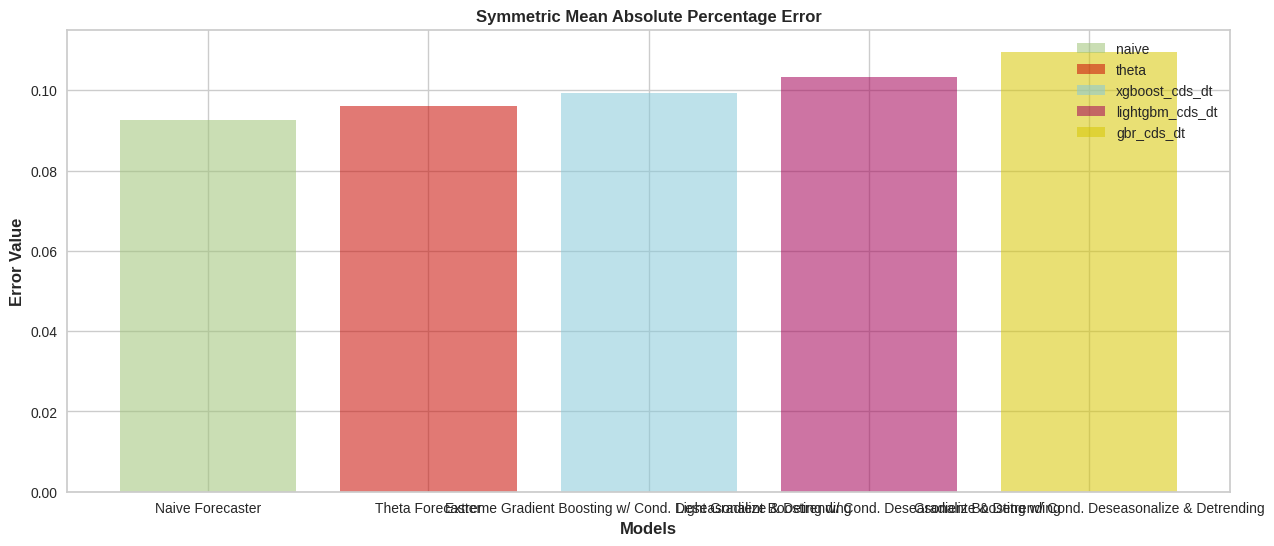

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
plt.xlabel('Models', fontsize = 12, weight = 'bold')
plt.ylabel('Error Value', fontsize = 12, weight = 'bold')
N = len(df['SMAPE'])
my_colors=['g','r','c','m','y']
model=['naive','theta','xgboost_cds_dt','lightgbm_cds_dt','gbr_cds_dt']
for x,y,c,lb in zip(df['Model'],df['SMAPE'],my_colors,model,):
    plt.bar(x, y, color=c,label=lb,alpha = 0.55)
plt.legend(model)
plt.title("Symmetric Mean Absolute Percentage Error",fontsize = 12, weight = 'bold')

Text(0.5, 1.0, 'R2 Score Error')

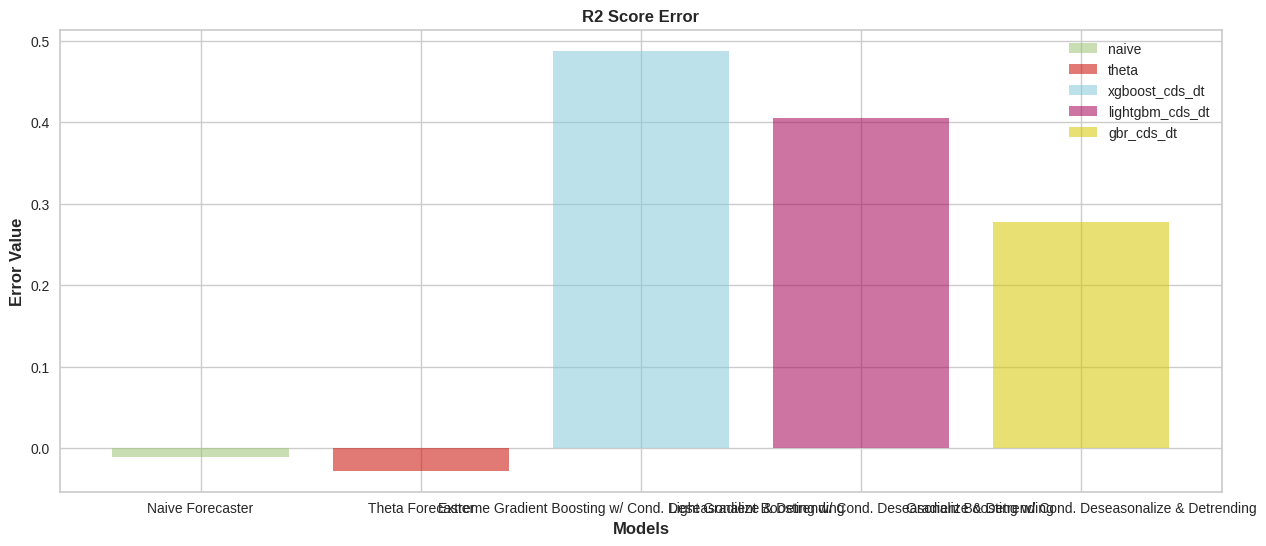

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
plt.xlabel('Models', fontsize = 12, weight = 'bold')
plt.ylabel('Error Value', fontsize = 12, weight = 'bold')
N = len(df['R2'])
my_colors=['g','r','c','m','y']
model=['naive','theta','xgboost_cds_dt','lightgbm_cds_dt','gbr_cds_dt']
for x,y,c,lb in zip(df['Model'],df['R2'],my_colors,model,):
    plt.bar(x, y, color=c,label=lb,alpha = 0.55)
plt.legend(model)
plt.title("R2 Score Error",fontsize = 12, weight = 'bold')

In [ ]:
y=data['TEMPERATURE'].tolist()
X=data.index.tolist()

#Applying Theta algorithm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(y)
model_fit = model.fit()

In [ ]:
y_cap_naive=exp.predict_model(best[0])['y_pred'].values
y_cap_naive

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,0.7799,1.0975,2.7926,5.4670,0.1103,0.1033,-0.0352


array([26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888,
       26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888,
       26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888,
       26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888,
       26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888, 26.0888,
       26.0888, 26.0888, 26.0888, 26.0888, 26.0888])

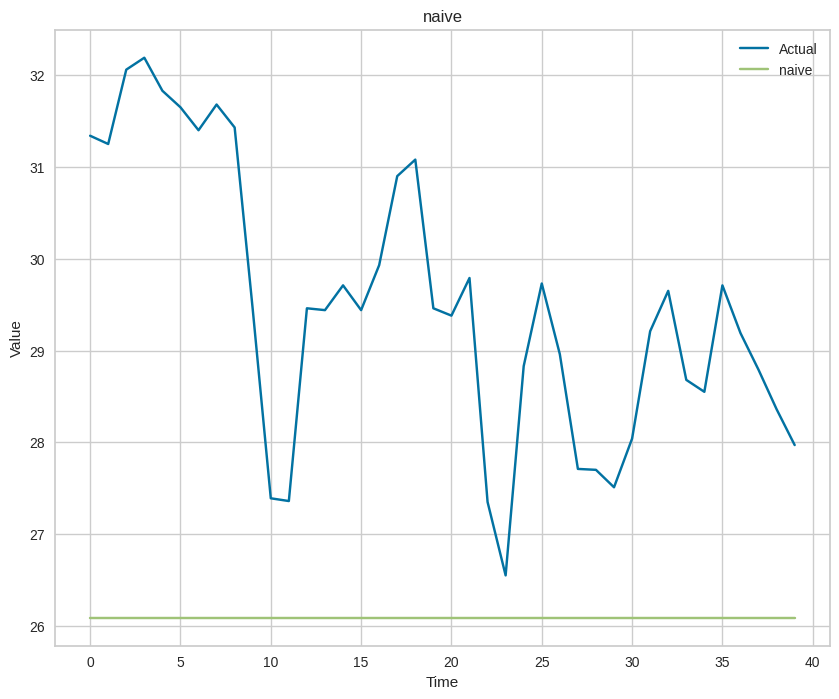

In [ ]:
#Plotting the grah of Y and Y_cap
plt.figure(figsize=(10,8))
plt.plot(y[358:398], label='Actual')
plt.plot(y_cap_naive, label='naive')
plt.title('naive')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

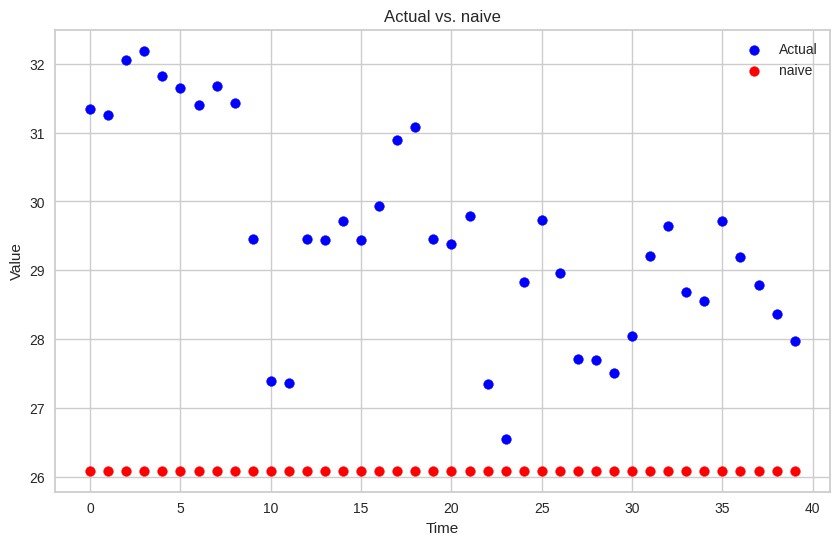

In [ ]:
# Scatter plot of y and y_cap
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y[358:398])), y[358:398], label='Actual', color='blue')
plt.scatter(range(len(y_cap_naive)), y_cap_naive, label='naive', color='red')
plt.title('Actual vs. naive')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
y_cap_theta=exp.predict_model(best[1])['y_pred'].values
y_cap_theta

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Theta Forecaster,0.8186,1.1097,2.9311,5.5281,0.1151,0.1086,-0.0585


array([26.0177, 26.2281, 26.0369, 26.0274, 25.9495, 25.888 , 25.8671,
       25.7376, 26.0157, 26.0989, 25.8434, 25.8533, 26.0575, 25.9529,
       26.0639, 25.9245, 26.1373, 26.2312, 26.3492, 26.519 , 26.3433,
       26.2851, 26.315 , 26.1845, 26.3484, 26.514 , 26.3723, 26.1908,
       26.0219, 26.0324, 26.0893, 26.0181, 26.2286, 26.0373, 26.0278,
       25.95  , 25.8884, 25.8675, 25.738 , 26.0161])

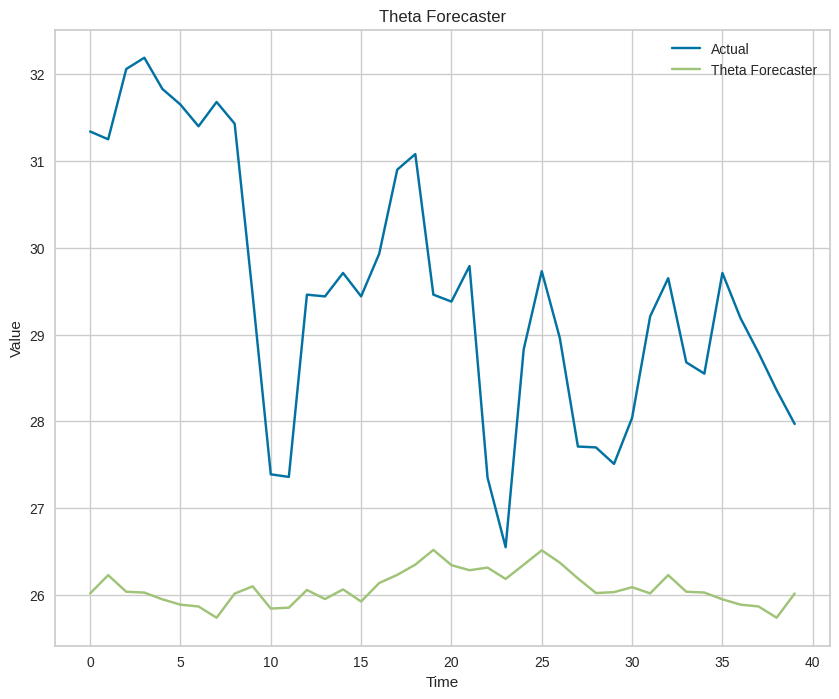

In [ ]:
#Plotting the grah of Y and Y_cap
plt.figure(figsize=(10,8))
plt.plot(y[358:398] ,label='Actual')
plt.plot(y_cap_theta, label='Theta Forecaster')
plt.title('Theta Forecaster')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

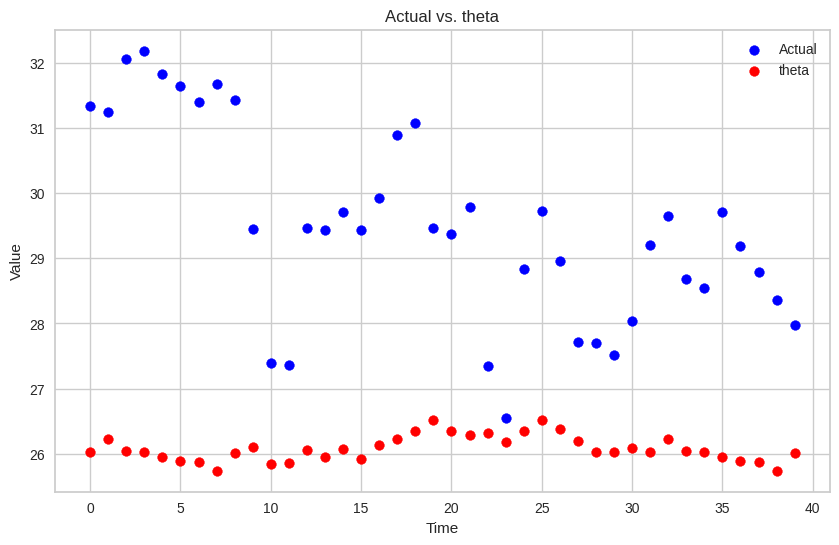

In [ ]:
# Scatter plot of y and y_cap
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y[358:398])), y[358:398], label='Actual', color='blue')
plt.scatter(range(len(y_cap_theta)), y_cap_theta, label='theta', color='red')
plt.title('Actual vs. theta')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
y_cap_xgboost_cds_dt=exp.predict_model(best[2])['y_pred'].values
y_cap_xgboost_cds_dt

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,XGBRegressor,0.8040,0.6680,2.8786,3.3277,0.1085,0.1144,0.6165


array([26.2082, 26.7028, 19.6255, 15.312 , 23.0415, 28.5022, 34.6346,
       36.2212, 35.0142, 31.173 , 28.777 , 26.3446, 24.7296, 21.1015,
       24.6374, 23.4628, 24.4398, 23.966 , 23.5101, 23.6779, 23.2768,
       22.4038, 22.4636, 22.6135, 22.6344, 23.0018, 23.011 , 22.7716,
       22.5198, 22.1396, 22.3887, 22.3141, 20.1282, 16.7987, 17.7145,
       22.6364, 30.5449, 35.2711, 35.5331, 31.7353])

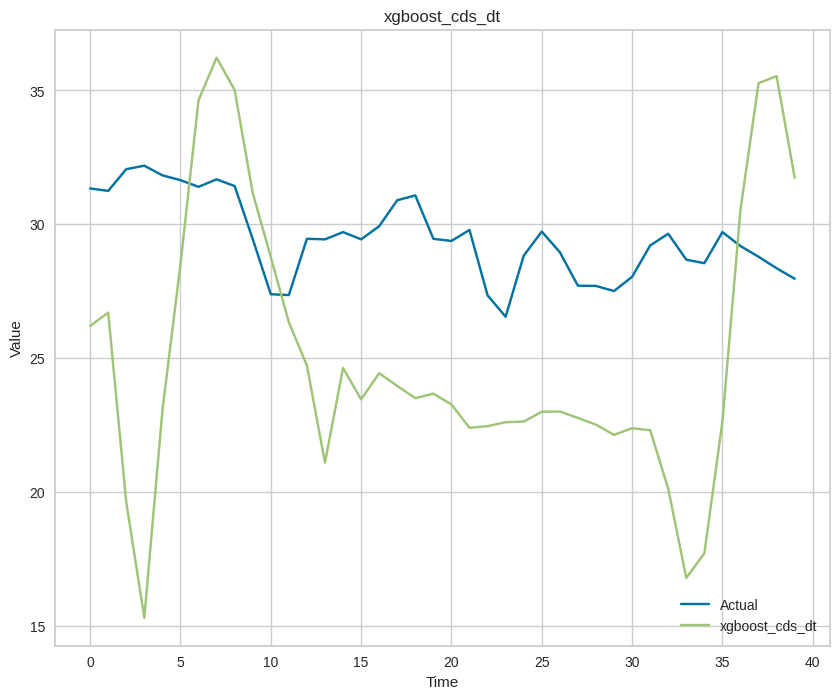

In [ ]:
#Plotting the grah of Y and Y_cap
plt.figure(figsize=(10,8))
plt.plot(y[358:398] ,label='Actual')
plt.plot(y_cap_xgboost_cds_dt, label='xgboost_cds_dt')
plt.title('xgboost_cds_dt')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

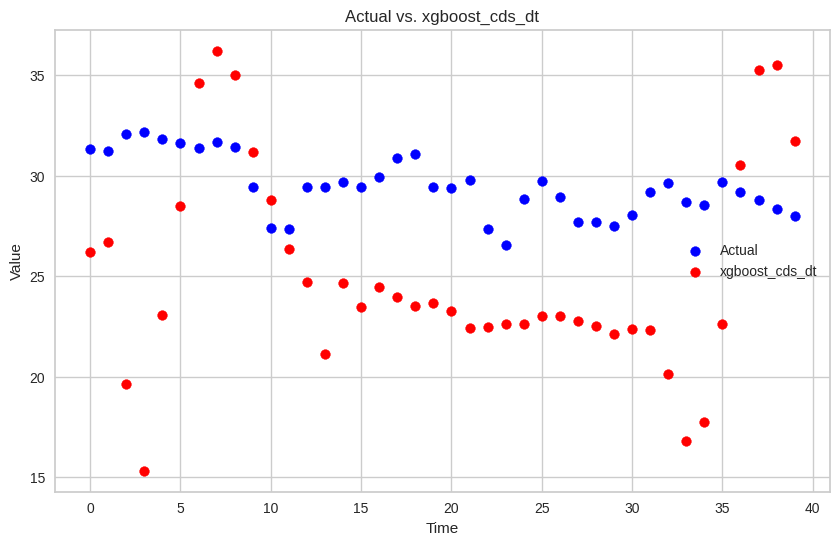

In [ ]:
# Scatter plot of y and y_cap
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y[358:398])), y[358:398], label='Actual', color='blue')
plt.scatter(range(len(y_cap_xgboost_cds_dt)), y_cap_xgboost_cds_dt, label='xgboost_cds_dt', color='red')
plt.title('Actual vs. xgboost_cds_dt')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
y_cap_lightgbm_cds_dt=exp.predict_model(best[3])['y_pred'].values
y_cap_lightgbm_cds_dt

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,0.8611,0.7033,3.0833,3.5037,0.1210,0.1243,0.5748


array([26.2392, 26.4331, 19.2771, 18.7273, 23.7396, 30.4766, 33.8304,
       38.4736, 34.5933, 31.1525, 28.5926, 27.3806, 24.7611, 20.3274,
       23.2796, 24.3505, 24.0923, 23.9384, 23.6019, 23.5246, 22.9231,
       22.4376, 22.3849, 21.9072, 22.3868, 22.5672, 22.6389, 22.6801,
       22.2619, 22.1995, 22.2379, 22.432 , 21.2196, 18.6594, 19.1329,
       24.5391, 31.1335, 34.7927, 37.1782, 31.4279])

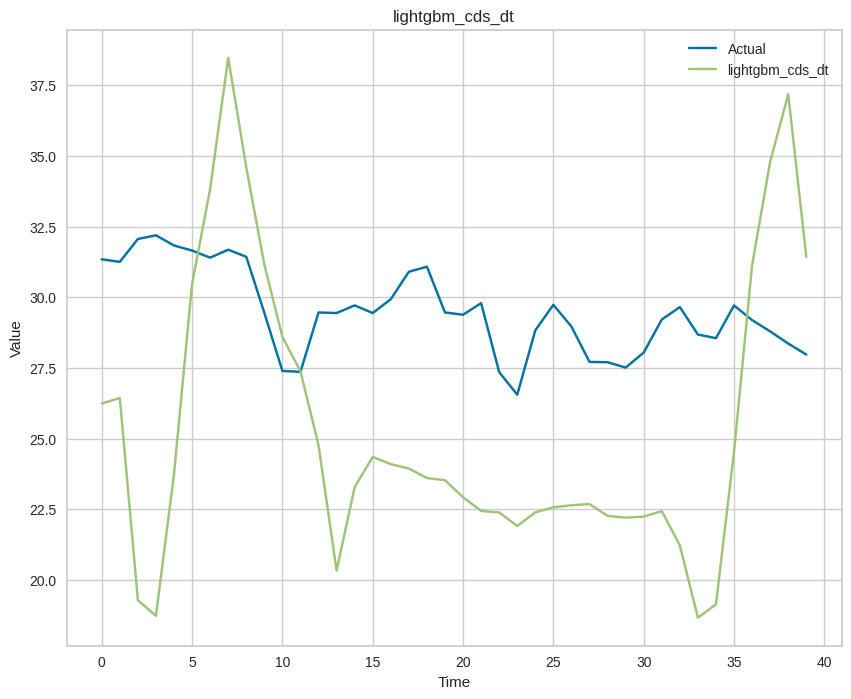

In [ ]:
#Plotting the grah of Y and Y_cap
plt.figure(figsize=(10,8))
plt.plot(y[358:398] ,label='Actual')
plt.plot(y_cap_lightgbm_cds_dt, label='lightgbm_cds_dt')
plt.title('lightgbm_cds_dt')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

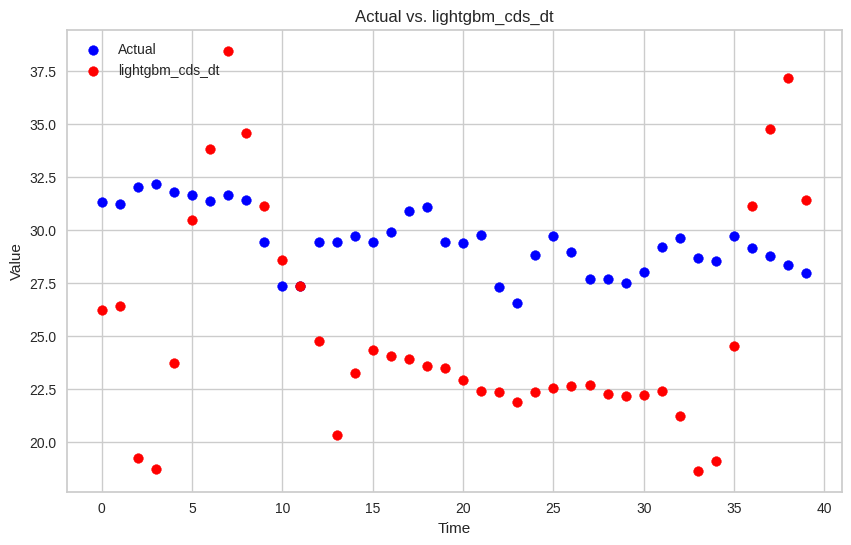

In [ ]:
# Scatter plot of y and y_cap
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y[358:398])), y[358:398], label='Actual', color='blue')
plt.scatter(range(len(y_cap_lightgbm_cds_dt)), y_cap_lightgbm_cds_dt, label='lightgbm_cds_dt', color='red')
plt.title('Actual vs. lightgbm_cds_dt')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
y_cap_gbr_cds_dt=exp.predict_model(best[4])['y_pred'].values
y_cap_gbr_cds_dt

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,GradientBoostingRegressor,0.7059,0.7514,2.5273,3.7429,0.0995,0.0950,0.5148


array([26.01  , 25.8095, 21.6377, 19.9754, 22.8207, 26.9424, 30.1627,
       32.8612, 32.8948, 30.6684, 29.1849, 28.379 , 28.146 , 26.2105,
       26.1053, 26.2655, 26.6797, 27.0154, 27.1258, 27.3995, 27.4445,
       27.5376, 27.9392, 27.5042, 27.657 , 28.0749, 28.0549, 27.8077,
       27.6584, 27.6052, 27.8367, 27.58  , 27.2135, 24.1482, 21.4118,
       24.023 , 26.3409, 29.0492, 29.9188, 30.5322])

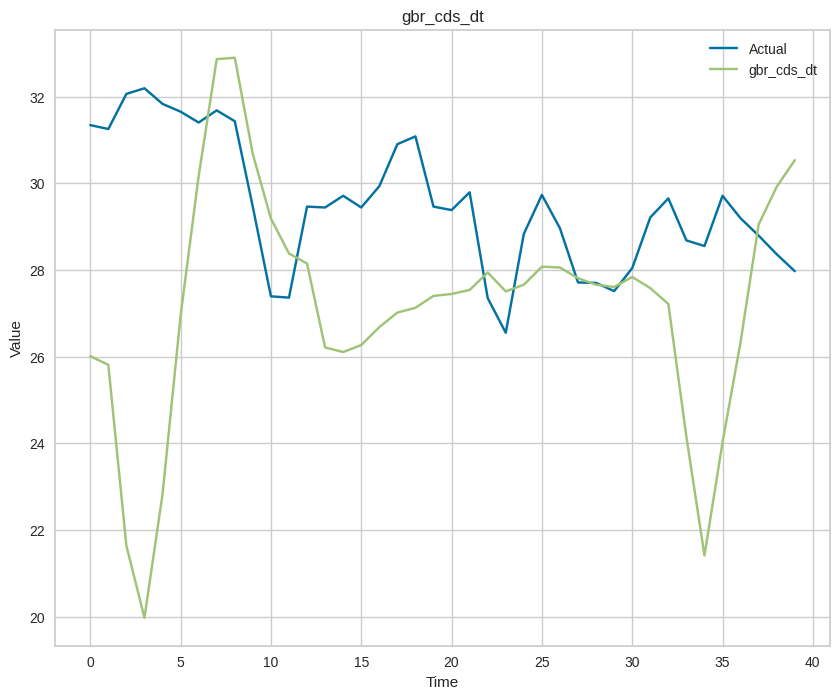

In [ ]:
#Plotting the grah of Y and Y_cap
plt.figure(figsize=(10,8))
plt.plot(y[358:398] ,label='Actual')
plt.plot(y_cap_gbr_cds_dt, label='gbr_cds_dt')
plt.title('gbr_cds_dt')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

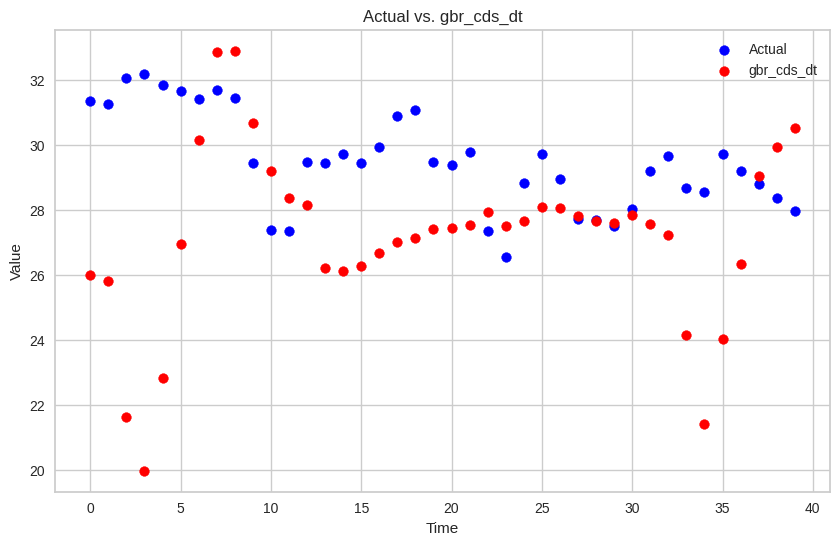

In [ ]:
# Scatter plot of y and y_cap
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y[358:398])), y[358:398], label='Actual', color='blue')
plt.scatter(range(len(y_cap_gbr_cds_dt)), y_cap_gbr_cds_dt, label='gbr_cds_dt', color='red')
plt.title('Actual vs. gbr_cds_dt')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()